##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

2026-02-11 18:46:58.408732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
Number of classes: 10


In [2]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

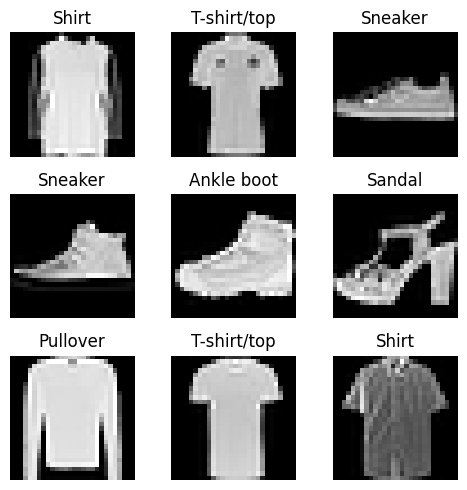

In [8]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5,5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(class_names[y_train[index]])
    plt.axis("off")
plt.tight_layout()
plt.show()

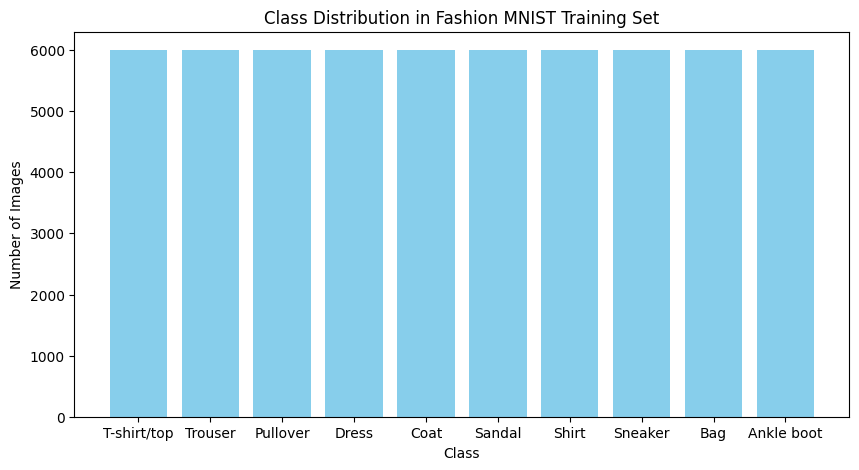

In [9]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train)


# Plot the class distribution
plt.figure(figsize=(10,5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in Fashion MNIST Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


In [10]:
# Check the minimum and maximum pixel values
print(f"Minimum pixel value: {x_train.min()}")
print(f"Maximum pixel value: {x_train.max()}")

Minimum pixel value: 0
Maximum pixel value: 255


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [11]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Normalize pixel values for x_train and x_test
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# No one-hot encoding needed as mentioned in the note above

# Build a CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

/opt/anaconda3/envs/cv_lab/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.8009 - loss: 0.5469 - val_accuracy: 0.8582 - val_loss: 0.3892
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8694 - loss: 0.3604 - val_accuracy: 0.8777 - val_loss: 0.3304
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.8847 - loss: 0.3118 - val_accuracy: 0.8876 - val_loss: 0.3060
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.8944 - loss: 0.2847 - val_accuracy: 0.8974 - val_loss: 0.2823
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9033 - loss: 0.2611 - val_accuracy: 0.8995 - val_loss: 0.2682
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9112 - loss: 0.2402 - val_accuracy: 0.9062 - val_loss: 0.2632
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9182 - loss: 0.2216 - val_accuracy: 0.9075 - val_loss: 0.2566
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9223 - loss: 0.2078 - 